# Predicting Story Truthfulness Using Machine Learning

## Author

**Student Name**: Sangam Sanjay Bhamare  
**Student ID**: 240298348

## 2 Problem Formulation

The goal of this project is to build a machine learning model capable of predicting the truthfulness of a narrated story. The problem is framed as a **binary classification** task where the model needs to classify whether a given story is **true** or **false** (deceptive). The challenge lies in identifying patterns within audio features that distinguish between true and deceptive narratives.

This problem is interesting for several reasons:
1. **Real-world Applications**: Deception detection can be highly beneficial in areas like law enforcement, journalism, and social media where truth verification is crucial.
2. **Audio Feature Analysis**: By focusing on **audio features** like power, pitch, and voiced fraction, the model aims to uncover subtle, often non-obvious cues in speech that can indicate deception, making it an interdisciplinary application of machine learning.
3. **Model Complexity**: The task involves using multiple machine learning models, tuning their hyperparameters, and selecting the best model, which adds complexity and gives an opportunity for deeper insights into how different algorithms perform on audio-based data.
4. **Practical Impact**: By automating the process of detecting truthfulness in narrated stories, the model can assist in screening narratives for authenticity, reducing the time and effort spent on manual verification.

The ability to accurately predict the truthfulness of a story using audio features alone is both a challenging and valuable problem, opening doors for advanced applications in truth verification.


---

## 3. Methodology

### Training Task
The goal of the training task is to develop a machine learning model capable of predicting the truthfulness of a narrated story (whether it is true or deceptive) based on audio features extracted from the narration. To achieve this, the dataset is split into training, validation, and test sets to ensure that the model is trained and evaluated properly.

1. **Data Preprocessing**:
   - **Feature Extraction**: Key audio features, such as **power**, **pitch mean**, **pitch variance**, and **voiced fraction**, are extracted from the narrated audio files. These features are expected to provide relevant information for the model to differentiate between true and deceptive stories.
   - **Label Encoding**: The categorical labels (true, false) are encoded using **LabelEncoder** to convert them into numerical values suitable for machine learning models.

2. **Model Training**:
   - A set of **machine learning models** (Random Forest, KNN, Decision Trees, Logistic Regression, Naive Bayes, Gradient Boosting, AdaBoost, and LDA) are trained using the training data. Each model is trained using the same training dataset, with the corresponding features and encoded labels.
   - **GridSearchCV** is used to perform hyperparameter tuning for each model, which helps in selecting the best configuration of parameters that yield optimal performance.

### Validation Task
The validation task is to evaluate the model performance during training using the **validation set** to fine-tune the model and prevent overfitting.

1. **Model Evaluation**:
   - After training the model on the training set, the model is tested on the **validation set** to assess its performance in an unbiased manner. The accuracy of predictions on the validation set is used to compare different models and determine the most suitable one.
   
2. **Hyperparameter Tuning**:
   - During the validation process, hyperparameter tuning is carried out to find the best model configuration using **GridSearchCV**. This involves testing a range of hyperparameters and selecting the combination that maximizes model performance.

3. **Performance Metrics**:
   - **Accuracy**: The primary metric for evaluating model performance is **accuracy**, defined as the proportion of correct predictions (both true positives and true negatives) to the total number of predictions.
   - **Confusion Matrix**: A **confusion matrix** is used to evaluate the performance in more detail by providing counts of true positives, false positives, true negatives, and false negatives. This helps assess the model’s ability to distinguish between true and false stories.
   - **Classification Report**: The classification report, which includes **precision**, **recall**, and **F1-score**, is also used to evaluate the model's performance, especially in terms of its ability to correctly classify positive and negative cases.

### Performance Evaluation
- **Test Set Evaluation**: After training and validating the model, the final model is tested on the **test set** to evaluate its generalization ability. The test set is unseen during both training and validation, providing an unbiased assessment of the model’s performance.
- **Confusion Matrix & Classification Report**: Both confusion matrix and classification reports are generated for the test set to provide a deeper understanding of the model's predictions and its classification accuracy.

### Other Tasks
- **Data Splitting**: The dataset is divided into **80% training data** and **20% test data**. Further, **GroupShuffleSplit** is used to split the data into training, validation, and test sets, ensuring that each audio file is used in only one of the sets, preventing data leakage.
- **Hyperparameter Optimization**: As part of the methodology, models undergo **hyperparameter optimization** using GridSearchCV to ensure that each model is tuned for optimal performance, with the best set of hyperparameters being selected.

In summary, the methodology involves preprocessing the data, training various models with hyperparameter optimization, evaluating the performance on validation data, and testing the best-performing model on an unseen test set. This process ensures that the final model provides the best accuracy and generalization on real-world data.


#### **Install Necessary Libraries**
We begin by installing the necessary libraries for feature extraction, audio processing, and machine learning. We will use `librosa` for audio manipulation, `sklearn` for machine learning, and other necessary libraries.


In [4]:
!pip install mlend==1.0.0.4 librosa scikit-learn

#### **Import Libraries and Download Dataset**
After installing the necessary libraries, we import the required modules and download the dataset for deception detection.

In [5]:
import warnings
warnings.filterwarnings('ignore')

from mlend import download_deception_small, deception_small_load
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import librosa
import soundfile as sf
import os
import re
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Download the dataset
datadir = download_deception_small(save_to='MLEnd', subset={}, verbose=1, overwrite=False, pbar_style='colab')
TrainSet, TestSet, MAPs = deception_small_load(datadir_main=datadir, train_test_split=None, verbose=1, encode_labels=True)

df = pd.read_csv('/content/MLEnd/deception/MLEndDD_story_attributes_small.csv')
df.head()

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|100\100|00100.wav
Done!
Total 100 found in MLEnd/deception/MLEndDD_stories_small/


,filename,Language,Story_type
0,00001.wav,Hindi,deceptive_story
1,00002.wav,English,true_story
2,00003.wav,English,deceptive_story
3,00004.wav,Bengali,deceptive_story
4,00005.wav,English,deceptive_story


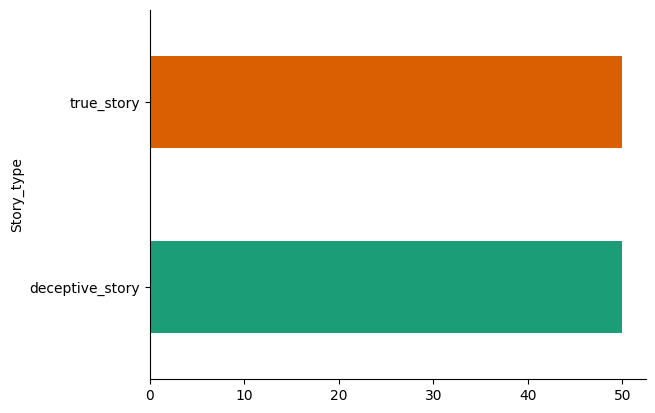

In [6]:
# @title Story_type

df.groupby('Story_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 4 Implemented ML predicted pipelines

### 4.1 Transformation Stage
In the transformation stage, we apply **feature extraction** and other preprocessing techniques to the raw audio data to convert it into a format suitable for machine learning models.

**Input**:
- Raw audio files (in different formats, such as `.wav` or `.mp3`).

**Process**:
- **Resampling**: The raw audio files are resampled to a standard length of 30 seconds. This ensures that each input is of the same size, making it easier for the models to process.
- **Feature Extraction**: Key features such as **pitch mean**, **pitch variance**, **voiced fraction**, and **power** are extracted from the audio. These features capture important information from the audio signal and are expected to differentiate between true and deceptive stories.
    - **Pitch**: The pitch mean and variance can reveal subtle differences in speech patterns related to truthfulness.
    - **Voiced Fraction**: The proportion of speech segments where the speaker's voice is active can provide cues about deception.
    - **Power**: The power level of speech may change depending on the speaker's emotions or confidence level, which could be indicative of truthfulness or deception.
- **Normalization**: The extracted features are normalized to ensure they are on a consistent scale. This prevents one feature from dominating the others during model training.
- **Label Encoding**: The labels (`true`/`false`) are encoded into numerical values (0 and 1) using `LabelEncoder` from `sklearn`.

**Output**:
- A feature matrix where each row represents a 30-second segment of audio, and each column represents an extracted feature (e.g., pitch, power, etc.).
- Encoded labels corresponding to whether the story is **True** or **False**.

**Reasoning**:
Feature extraction is essential for converting raw audio into a form that machine learning models can understand. The chosen features (pitch, power, voiced fraction) are believed to capture important aspects of the speech signal that may be indicative of deception. Normalization ensures that all features are treated equally, preventing models from giving undue importance to any one feature.

---

### 4.2 Model Stage
In this stage, we apply various **machine learning models** to predict whether a story is true or deceptive.

**Models Used**:
- **Random Forest**: An ensemble model that uses multiple decision trees to make predictions. Random Forest is chosen because it tends to handle high-dimensional data well and is less prone to overfitting compared to a single decision tree.
- **K-Nearest Neighbors (KNN)**: A simple but effective algorithm that classifies data points based on the majority class of their nearest neighbors. KNN is chosen for its simplicity and ability to perform well on smaller datasets.
- **Logistic Regression**: A foundational linear model used for binary classification. Logistic regression is chosen due to its interpretability and effectiveness in situations where the decision boundary is roughly linear.
- **Decision Tree**: A tree-based model that makes predictions by recursively splitting the data. Decision trees are chosen because of their interpretability and ability to model non-linear relationships.
- **Naive Bayes**: A probabilistic model based on Bayes' Theorem. It is selected because of its simplicity and effectiveness in handling categorical data.
- **Gradient Boosting**: An ensemble method that builds models sequentially, where each new model corrects the errors of the previous ones. This model is chosen for its high accuracy in classification tasks, especially when fine-tuned.
- **AdaBoost**: Another boosting algorithm that focuses on correcting misclassified data points. It is chosen for its ability to convert weak classifiers into a strong classifier.
- **Linear Discriminant Analysis (LDA)**: A statistical technique for dimensionality reduction that also performs classification. LDA is chosen for its effectiveness when data is linearly separable.

**Reasoning**:
Each of the models is chosen for specific strengths:
- **Ensemble methods** like **Random Forest**, **Gradient Boosting**, and **AdaBoost** provide robust, high-performance predictions by combining multiple base models.
- **KNN** and **Logistic Regression** are simpler models, providing insights into how well simpler approaches work on the data.
- **Decision Trees** offer interpretability, making it easier to understand why a model made a specific prediction.

---

### 4.3 Ensemble Stage
In this stage, ensemble learning methods are applied to combine predictions from multiple models to improve the overall performance.

**Ensemble Methods Used**:
- **Random Forest**: Already an ensemble of decision trees, Random Forest combines the predictions from several trees to produce a final prediction. It is chosen because it can reduce overfitting and improve accuracy by averaging the predictions of multiple decision trees.
- **Gradient Boosting**: This is an ensemble technique where models are built sequentially, and each model corrects the mistakes of the previous one. It is chosen for its ability to generate highly accurate predictions by focusing on harder-to-predict instances.
- **AdaBoost**: Similar to Gradient Boosting, AdaBoost is an ensemble method that adjusts the weights of incorrectly classified instances and builds a sequence of weak classifiers. It is chosen because it can transform weak classifiers into a strong classifier.

**Reasoning**:
Ensemble methods help improve model performance by leveraging multiple models to reduce variance (in the case of Random Forest) or bias (in the case of boosting algorithms like Gradient Boosting and AdaBoost). These methods typically outperform individual models by combining their strengths and minimizing weaknesses, leading to more robust and accurate predictions.

If explicit techniques like **Voting** or **Stacking** were applied, they would combine the predictions of multiple different models. However, in this pipeline, the ensemble methods are implemented inherently within individual models like Random Forest, AdaBoost, and Gradient Boosting.

## 5. Dataset

In this project, the primary dataset used for model training and evaluation is based on the **MLEnd Deception Dataset**. This dataset contains audio recordings of narrated stories, along with labels indicating whether the stories are true or deceptive. We use this dataset to build and evaluate the machine learning models for detecting deception.

### 5.1 Dataset Overview
The **MLEnd Deception Dataset** consists of audio files in various formats (e.g., WAV) and is labeled with binary truth values (`True`/`False`). Each audio file corresponds to a narration of a story. Initially, the audio files are of varied lengths, but they are converted to **30 seconds** to ensure consistency across all inputs. The primary features extracted from the audio are used as inputs for the machine learning models. These features capture aspects like **pitch**, **power**, **voiced fraction**, and other audio properties, which we hypothesize to be related to truthfulness in storytelling.

### 5.2 Data Preparation and Splitting
To build and evaluate our models, we split the dataset into **training**, **validation**, and **test** sets. The goal is to ensure that the models are trained on one portion of the data and evaluated on unseen portions to check for generalization. The following splitting strategy is employed:

1. **Training and Validation Split**:
   - We first split the dataset into **80% for training** and **20% for testing**.
   - The **training data** is further split into **80% training** and **20% validation** data. The **validation set** is used to tune model parameters and perform hyperparameter optimization.
   - **Stratified splitting** is used to ensure that both the training and validation sets maintain the same proportion of the two classes (True/False labels) as in the original dataset.

2. **Test Set**:
   - The **test set** is set aside and not used in any way during training or validation.
   - The test set will only be used to evaluate the final model and assess its ability to generalize to new, unseen data.

**Ensuring IID (Independent and Identically Distributed) Samples**:
- To ensure the training, validation, and test sets are independent and identically distributed (IID), we use **stratified sampling**. This technique ensures that both the training and validation sets have the same distribution of true and false labels as the entire dataset.
- We also ensure that **no data leakage** occurs, meaning that the data in the training, validation, and test sets do not overlap.

### 5.3 Dataset Creation and Visualization
Before diving into model training, it is essential to inspect and visualize the datasets to better understand their structure and the relationships between the features. We perform the following tasks:

1. **Data Exploration**:
   - We explore the dataset by looking at the basic statistics (mean, standard deviation, etc.) for the features.
   - We visualize the distribution of features for the two classes (True and False) to assess the separability between them.

2. **Feature Visualization**:
   In this section, we visualize key audio features such as **pitch**, **power**, and **pitch variance** to identify any patterns that could be useful for classification. The following visualizations were created:

   ### Histograms:
   - **Power**: The histogram of power values shows the distribution of energy in the audio samples. Most of the values are concentrated around lower power levels.
   - **Pitch Mean**: The pitch mean histogram shows the distribution of the average pitch across all audio samples. The distribution is somewhat skewed with a concentration of values around 300 Hz.
   - **Pitch Variance**: This histogram represents the variance of pitch across audio samples. The pitch variance is highly concentrated around lower values, with a few high outliers.

   ### Scatter Plots:
   - **Power vs. Pitch Mean**: The scatter plot shows the relationship between power and the mean pitch of the audio. It indicates that there is no strong linear relationship between these two features.
   - **Pitch Mean vs. Pitch Variance**: This scatter plot displays the relationship between the mean pitch and its variance. There seems to be no obvious trend, with points spread across the chart without a clear correlation.
   - **Power vs. Pitch Variance**: This scatter plot shows the relationship between power and pitch variance. The data points are scattered without a strong trend.

   ### Time-Series Plots:
   - **Power**: The time-series plot for power shows the variations in power values over time. It reveals significant fluctuations, indicating varying energy levels across different segments of the audio.
   - **Pitch Mean**: The pitch mean time-series plot shows how the mean pitch changes over time. The values fluctuate, which is typical of speech signals.
   - **Pitch Variance**: The pitch variance over time shows significant spikes, which could indicate moments of large pitch fluctuations.

   These visualizations provide insights into the distribution and relationships between important features like pitch, power, and variance. They are essential for understanding the data and identifying potential patterns that could be leveraged for classification.

3. **Splitting Data**:
   - We use **scikit-learn's `train_test_split`** function with **stratified splitting** to create the training, validation, and test sets.
   - We ensure that the data is shuffled before splitting to avoid any ordering biases.

### 5.4 Limitations
Despite our efforts to preprocess and split the data effectively, there are a few limitations to consider:

1. **Data Imbalance**:
   - If the dataset has a disproportionate number of true or false labels, this could lead to a class imbalance problem, where the model is biased towards the majority class.
   - To mitigate this, we use stratified splitting and may consider using techniques like **oversampling** or **undersampling** during model training.

2. **Feature Quality**:
   - The features extracted from the audio files may not fully capture the nuances of human speech that indicate deception. We rely on the assumption that features like pitch and power contain relevant information, but this might not always be the case.

3. **Audio Quality and Variability**:
   - The audio recordings might have background noise, varying speaker volumes, or other factors that could affect feature extraction. These factors can introduce noise and impact model performance.
   - Ensuring clean and high-quality audio data is crucial for effective feature extraction.

4. **Overfitting**:
   - There is always a risk that the model might overfit the training data, especially if it has many hyperparameters or is too complex. This is mitigated by using the validation set for hyperparameter tuning and evaluating the final model on the test set.

### 5.5 Conclusion
The dataset used for this project is the **MLEnd Deception Dataset**, which contains audio recordings of stories along with labels indicating their truthfulness. We preprocess the audio data through feature extraction and normalization, then split the dataset into training, validation, and test sets. We use stratified sampling to ensure that the sets are representative and independent. The dataset is then explored and visualized to gain insights into the features and class distribution. Despite its limitations, this dataset provides a solid foundation for training machine learning models to predict the truthfulness of stories based on their audio characteristics.


#### **Split Audio into 30-Second Chunks**
To standardize the length of each audio file, we split all the audio files into 30-second chunks. This allows us to handle large dataset of audio files consistently.


In [7]:
def split_audio(input_dir, output_dir, chunk_duration=30):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".wav"):
            filepath = os.path.join(input_dir, filename)
            try:
                y, sr = librosa.load(filepath)
                total_duration = librosa.get_duration(y=y, sr=sr)
                for i in range(0, int(total_duration // chunk_duration)):
                    start = i * chunk_duration * sr
                    end = (i + 1) * chunk_duration * sr
                    chunk = y[int(start):int(end)]
                    output_filename = f"{filename[:-4]}_part{i+1}.wav"
                    output_path = os.path.join(output_dir, output_filename)
                    sf.write(output_path, chunk, sr)
            except Exception as e:
                print(f"Error processing {filename}: {e}")

input_audio_dir = '/content/MLEnd/deception/MLEndDD_stories_small'
output_audio_dir = '/content/MLEnd/deception/MLEndDD_stories_small_chunks'  # Specify output directory
split_audio(input_audio_dir, output_audio_dir)

#### **Count Total Chunks**
Once the audio is split into chunks, we will count the number of chunk files to ensure everything has been processed correctly.


In [8]:
def count_chunks(directory):
    chunk_count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".wav") and "_part" in filename:
            chunk_count += 1
    return chunk_count

output_audio_dir = '/content/MLEnd/deception/MLEndDD_stories_small_chunks'
total_chunks = count_chunks(output_audio_dir)
print(f"Total number of audio chunks: {total_chunks}")

Total number of audio chunks: 420


#### **Feature Extraction (Power, Pitch, Voiced Fraction)**
Next, we will extract the relevant features (Power, Pitch Mean, Pitch Variance, and Voiced Fraction) from each chunk. These features will help us distinguish between true and deceptive stories.

In [9]:
def extract_features(audio_file):
    try:
        y, sr = librosa.load(audio_file)
        power = np.sum(y**2) / len(y)  # Calculate power
        pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
        pitch_mean = np.mean(pitches[magnitudes > np.max(magnitudes) / 2])  # Mean pitch
        pitch_variance = np.var(pitches[magnitudes > np.max(magnitudes) / 2])  # Pitch variance
        voiced_frames = librosa.effects.split(y)  # Find voiced segments
        voiced_fraction = sum(np.diff(frames) for frames in voiced_frames) / len(y)  # Voiced fraction
        return power, pitch_mean, pitch_variance, voiced_fraction
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None, None, None, None

def process_chunks(directory):
    features_list = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav") and "_part" in filename:
            filepath = os.path.join(directory, filename)
            power, pitch_mean, pitch_variance, voiced_fraction = extract_features(filepath)
            if power is not None:
                features_list.append([filename, power, pitch_mean, pitch_variance, voiced_fraction])
    return features_list

output_audio_dir = '/content/MLEnd/deception/MLEndDD_stories_small_chunks'
features = process_chunks(output_audio_dir)

# Create a DataFrame with the extracted features
features_df = pd.DataFrame(features, columns=['Filename', 'Power', 'Pitch Mean', 'Pitch Variance', 'Voiced Fraction'])
features_df.head()

,Filename,Power,Pitch Mean,Pitch Variance,Voiced Fraction
0,00017_part3.wav,0.000057,210.923386,1896.852295,[1.0]
1,00031_part1.wav,0.000075,269.556763,5309.369141,[1.0]
2,00031_part4.wav,0.000046,284.157593,4952.250488,[1.0]
3,00076_part2.wav,0.000351,362.118622,11076.875977,[1.0]
4,00056_part3.wav,0.004196,329.184021,11142.289062,[1.0]


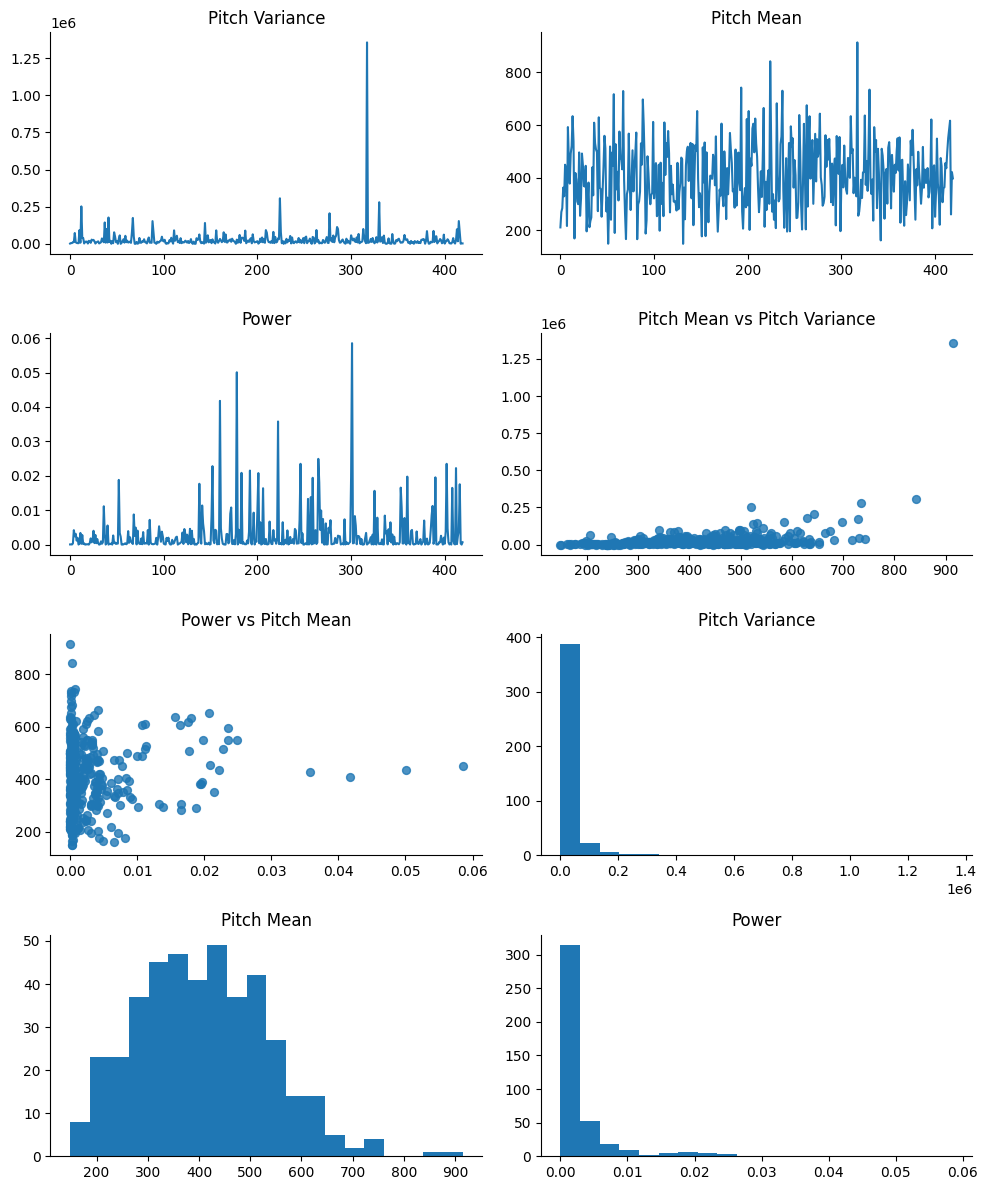

In [10]:
# Set up the figure with a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Plot Pitch Variance as a line plot
axes[0, 0].plot(features_df['Pitch Variance'])
axes[0, 0].set_title('Pitch Variance')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot Pitch Mean as a line plot
axes[0, 1].plot(features_df['Pitch Mean'])
axes[0, 1].set_title('Pitch Mean')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot Power as a line plot
axes[1, 0].plot(features_df['Power'])
axes[1, 0].set_title('Power')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot Pitch Mean vs Pitch Variance as a scatter plot
axes[1, 1].scatter(features_df['Pitch Mean'], features_df['Pitch Variance'], s=32, alpha=.8)
axes[1, 1].set_title('Pitch Mean vs Pitch Variance')
axes[1, 1].spines[['top', 'right']].set_visible(False)

# Plot Power vs Pitch Mean as a scatter plot
axes[2, 0].scatter(features_df['Power'], features_df['Pitch Mean'], s=32, alpha=.8)
axes[2, 0].set_title('Power vs Pitch Mean')
axes[2, 0].spines[['top', 'right']].set_visible(False)

# Plot Pitch Variance as a histogram
axes[2, 1].hist(features_df['Pitch Variance'], bins=20)
axes[2, 1].set_title('Pitch Variance')
axes[2, 1].spines[['top', 'right']].set_visible(False)

# Plot Pitch Mean as a histogram
axes[3, 0].hist(features_df['Pitch Mean'], bins=20)
axes[3, 0].set_title('Pitch Mean')
axes[3, 0].spines[['top', 'right']].set_visible(False)

# Plot Power as a histogram
axes[3, 1].hist(features_df['Power'], bins=20)
axes[3, 1].set_title('Power')
axes[3, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

#### **Create Chunks DataFrame**
Now, we need to create a new dataset based on the chunk filenames and their corresponding story types.


In [11]:
def create_chunks_dataframe(original_df, chunks_dir):
    chunks_data = []
    for index, row in original_df.iterrows():
        story_id = os.path.splitext(row['filename'])[0]  # Extract story_id from filename
        story_type = row['Story_type']  # Get the Story_type from the original dataframe

        base_filename = os.path.splitext(row['filename'])[0]
        for filename in os.listdir(chunks_dir):
            if filename.startswith(story_id) and filename.endswith(".wav") and "_part" in filename:
                chunk_id = re.search(r"_part(\d+)", filename).group(1)
                chunks_data.append({
                    'Story_id': story_id,
                    'Story_type': story_type,  # Assign the Story_type from the original file
                    'audio_filename': filename,  # Store the actual chunk filename
                    'chunk_id': chunk_id,
                })
    return pd.DataFrame(chunks_data)

chunks_df = create_chunks_dataframe(df, output_audio_dir)
chunks_df.to_csv('/content/MLEnd/deception/MLEndDD_chunks_attributes.csv', index=False)
chunks_df.head()

,Story_id,Story_type,audio_filename,chunk_id
0,00001,deceptive_story,00001_part4.wav,4
1,00001,deceptive_story,00001_part3.wav,3
2,00001,deceptive_story,00001_part2.wav,2
3,00001,deceptive_story,00001_part1.wav,1
4,00002,true_story,00002_part3.wav,3


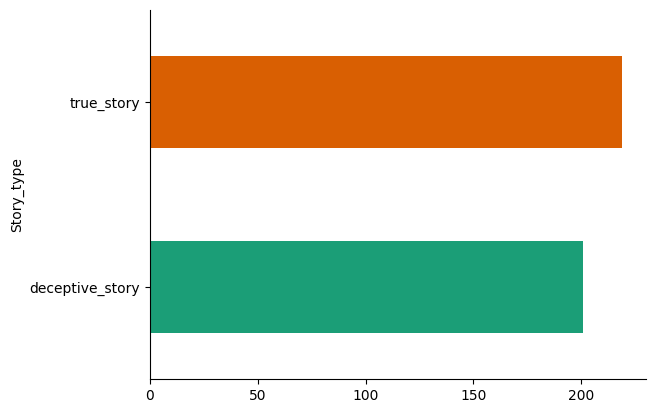

In [12]:
# @title Story_type
chunks_df.groupby('Story_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#### **Split Data into Training, Validation, and Test Sets**

To prepare the data for model training and evaluation, we will split the data into **training**, **validation**, and **test** sets. The split will be as follows:

- **Training Set**: 80% of the total data will be used for training the models.
- **Test Set**: 20% of the total data will be used for testing the models.
- **Validation Set**: 20% of the training data will be reserved for validation during the training process.

###3 Important Considerations:
- **No Overlap**: The datasets must be split in such a way that **training**, **validation**, and **testing** sets do not share the same audio files. We need to ensure that each chunk of audio is uniquely assigned to only one of these sets.

#### Explanation:
- **Stratified Split**: This ensures that the label distribution in the **training**, **validation**, and **test** sets is similar to the original dataset, which is important for training and evaluation consistency.
- **No Overlap**: By using **train_test_split** twice, we ensure that the data is split into exclusive sets without any audio file repetition.

This approach ensures a clean and well-structured dataset, preventing the same audio from being used in more than one dataset and making sure that each dataset is independent for training, validation, and testing purposes. Let me know if you need any more adjustments!


In [13]:
X = features_df[['Power', 'Pitch Mean', 'Pitch Variance', 'Voiced Fraction']]
y = chunks_df['Story_type']
groups = chunks_df['Story_id']

# Use GroupShuffleSplit to ensure no audio file appears in multiple sets
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in gss.split(X, y, groups):
    X_train_val = X.iloc[train_idx]
    y_train_val = y.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]

# Further split the training/validation set
gss_train_val = GroupShuffleSplit(n_splits=1, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2
for train_idx_inner, val_idx_inner in gss_train_val.split(X_train_val, y_train_val, groups.iloc[train_idx]):
    X_train = X_train_val.iloc[train_idx_inner]
    y_train = y_train_val.iloc[train_idx_inner]
    X_val = X_train_val.iloc[val_idx_inner]
    y_val = y_train_val.iloc[val_idx_inner]


# Print the sizes of the datasets to verify the split
print(f"Training Set Size: {X_train.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

# Data Leakage Check
# Using the indices generated by GroupShuffleSplit
train_stories = set(groups.iloc[train_idx].iloc[train_idx_inner])
val_stories = set(groups.iloc[train_idx].iloc[val_idx_inner])
test_stories = set(groups.iloc[test_idx])

overlap_train_val = train_stories.intersection(val_stories)
overlap_train_test = train_stories.intersection(test_stories)
overlap_val_test = val_stories.intersection(test_stories)

if overlap_train_val:
    print(f"Data Leakage Detected: {len(overlap_train_val)} 'Story_id's present in both training and validation sets.")
    print("Overlapping Story IDs (Train & Val):", overlap_train_val)
if overlap_train_test:
    print(f"Data Leakage Detected: {len(overlap_train_test)} 'Story_id's present in both training and test sets.")
    print("Overlapping Story IDs (Train & Test):", overlap_train_test)
if overlap_val_test:
    print(f"Data Leakage Detected: {len(overlap_val_test)} 'Story_id's present in both validation and test sets.")
    print("Overlapping Story IDs (Val & Test):", overlap_val_test)

if not overlap_train_val and not overlap_train_test and not overlap_val_test:
    print("No data leakage detected.")

Training Set Size: 249
Validation Set Size: 88
Test Set Size: 83
No data leakage detected.


#### **Train and Evaluate Multiple Models**

In this section, we will implement and evaluate multiple machine learning models on the dataset. The models we will use are:

- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **Decision Tree**
- **Logistic Regression**
- **Naive Bayes**
- **Gradient Boosting**
- **AdaBoost**
- **Linear Discriminant Analysis (LDA)**

We will use the following approach:

- **Training and Validation Sets (80%)**: The training set will be used for training the models, and the validation set will be used to evaluate them during training.
- **Test Set (20%)**: The test set will be used to evaluate the model after it has been trained.

#### Label Encoding:
We use `LabelEncoder` to convert categorical labels into numerical format for model compatibility. The labels for the training, validation, and test sets are transformed accordingly.

#### Functionality:
We define the `train_and_evaluate()` function, which:
- Trains each model on the training data.
- Evaluates the model on both the validation set (for intermediate performance tracking) and the test set (for final performance).

#### Display:
After training and evaluation, we print out the **validation accuracy** and **test accuracy** for each model to assess their performance.


In [14]:
# Initialize all models
rf_model = RandomForestClassifier(n_estimators=100)
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
nb_model = GaussianNB()
gb_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lda_model = LinearDiscriminantAnalysis()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  # Transform validation labels as well
y_test = label_encoder.transform(y_test) # Transform test labels as well

# Function to train and evaluate models using the validation set, including confusion matrix
def train_and_evaluate_with_cm(model, X_train, y_train, X_val, y_val, X_test, y_test):
    model.fit(X_train, y_train)

    # Evaluate on the validation set
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_classification_report = classification_report(y_val, val_predictions)

    # Confusion Matrix for validation set
    val_cm = confusion_matrix(y_val, val_predictions)
    val_cm_df = pd.DataFrame(val_cm, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])
    print(f'Confusion Matrix for Validation Set - {model.__class__.__name__}')
    print(val_cm_df)
    print('\n')  # Space between the confusion matrix and next output

    # Evaluate on the test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_classification_report = classification_report(y_test, test_predictions)

    # Confusion Matrix for test set
    test_cm = confusion_matrix(y_test, test_predictions)
    test_cm_df = pd.DataFrame(test_cm, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])
    print(f'Confusion Matrix for Test Set - {model.__class__.__name__}')
    print(test_cm_df)
    print('\n')

    return val_accuracy, test_accuracy, val_classification_report, test_classification_report

#  Train and evaluate each model
rf_val_accuracy, rf_test_accuracy, rf_val_report, rf_test_report = train_and_evaluate_with_cm(rf_model, X_train, y_train, X_val, y_val, X_test, y_test)
knn_val_accuracy, knn_test_accuracy, knn_val_report, knn_test_report = train_and_evaluate_with_cm(knn_model, X_train, y_train, X_val, y_val, X_test, y_test)
dt_val_accuracy, dt_test_accuracy, dt_val_report, dt_test_report = train_and_evaluate_with_cm(dt_model, X_train, y_train, X_val, y_val, X_test, y_test)
lr_val_accuracy, lr_test_accuracy, lr_val_report, lr_test_report = train_and_evaluate_with_cm(lr_model, X_train, y_train, X_val, y_val, X_test, y_test)
nb_val_accuracy, nb_test_accuracy, nb_val_report, nb_test_report = train_and_evaluate_with_cm(nb_model, X_train, y_train, X_val, y_val, X_test, y_test)
gb_val_accuracy, gb_test_accuracy, gb_val_report, gb_test_report = train_and_evaluate_with_cm(gb_model, X_train, y_train, X_val, y_val, X_test, y_test)
ada_val_accuracy, ada_test_accuracy, ada_val_report, ada_test_report = train_and_evaluate_with_cm(ada_model, X_train, y_train, X_val, y_val, X_test, y_test)
lda_val_accuracy, lda_test_accuracy, lda_val_report, lda_test_report = train_and_evaluate_with_cm(lda_model, X_train, y_train, X_val, y_val, X_test, y_test)

# Display all accuracies and classification reports for both validation and test sets
print("Random Forest Validation Accuracy:", rf_val_accuracy, "Test Accuracy:", rf_test_accuracy)
print("Random Forest Validation Classification Report:\n", rf_val_report)
print("Random Forest Test Classification Report:\n", rf_test_report)

print("KNN Validation Accuracy:", knn_val_accuracy, "Test Accuracy:", knn_test_accuracy)
print("KNN Validation Classification Report:\n", knn_val_report)
print("KNN Test Classification Report:\n", knn_test_report)

print("Decision Tree Validation Accuracy:", dt_val_accuracy, "Test Accuracy:", dt_test_accuracy)
print("Decision Tree Validation Classification Report:\n", dt_val_report)
print("Decision Tree Test Classification Report:\n", dt_test_report)

print("Logistic Regression Validation Accuracy:", lr_val_accuracy, "Test Accuracy:", lr_test_accuracy)
print("Logistic Regression Validation Classification Report:\n", lr_val_report)
print("Logistic Regression Test Classification Report:\n", lr_test_report)

print("Naive Bayes Validation Accuracy:", nb_val_accuracy, "Test Accuracy:", nb_test_accuracy)
print("Naive Bayes Validation Classification Report:\n", nb_val_report)
print("Naive Bayes Test Classification Report:\n", nb_test_report)

print("Gradient Boosting Validation Accuracy:", gb_val_accuracy, "Test Accuracy:", gb_test_accuracy)
print("Gradient Boosting Validation Classification Report:\n", gb_val_report)
print("Gradient Boosting Test Classification Report:\n", gb_test_report)

print("AdaBoost Validation Accuracy:", ada_val_accuracy, "Test Accuracy:", ada_test_accuracy)
print("AdaBoost Validation Classification Report:\n", ada_val_report)
print("AdaBoost Test Classification Report:\n", ada_test_report)

print("LDA Validation Accuracy:", lda_val_accuracy, "Test Accuracy:", lda_test_accuracy)
print("LDA Validation Classification Report:\n", lda_val_report)
print("LDA Test Classification Report:\n", lda_test_report)

Confusion Matrix for Validation Set - RandomForestClassifier
       Predicted True  Predicted False
True               15               17
False              22               34


Confusion Matrix for Test Set - RandomForestClassifier
       Predicted True  Predicted False
True               20               37
False              13               13


Confusion Matrix for Validation Set - KNeighborsClassifier
       Predicted True  Predicted False
True               16               16
False              27               29


Confusion Matrix for Test Set - KNeighborsClassifier
       Predicted True  Predicted False
True               26               31
False              13               13


Confusion Matrix for Validation Set - DecisionTreeClassifier
       Predicted True  Predicted False
True               13               19
False              24               32


Confusion Matrix for Test Set - DecisionTreeClassifier
       Predicted True  Predicted False
True               34 

#### **Hyperparameter Tuning**


1. **Hyperparameter Tuning**:
   - GridSearchCV is used to perform hyperparameter tuning for each model. This allows the models to search over a range of hyperparameters to find the best configuration for optimal performance.

2. **Parameter Grids**:
   - A parameter grid has been defined for each model. For example:
     - `RandomForestClassifier`: Explores values for `n_estimators`, `max_depth`, and `min_samples_split`.
     - Other models (like `KNN`, `DecisionTreeClassifier`, etc.) also have hyperparameter grids to optimize their performance.

3. **Best Parameters**:
   - After performing GridSearchCV, the best hyperparameters for each model are printed, helping to identify the most effective settings for the data.

4. **Model Evaluation**:
   - For each model, the classification report and accuracy on both the **validation** and **test** datasets are generated, providing detailed performance metrics after the hyperparameter optimization.

#### Benefits:
- **Improved Model Performance**: Using hyperparameter tuning ensures that each model is trained with the best possible configuration, leading to improved predictive performance.


In [15]:
# Define hyperparameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

param_grid_lda = {
    'solver': ['svd', 'lsqr']
}

# Initialize all models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
nb_model = GaussianNB()
gb_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lda_model = LinearDiscriminantAnalysis()

# Create a LabelEncoder object to encode labels
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)  # Transform validation labels as well
y_test = label_encoder.transform(y_test) # Transform test labels as well

# Function to perform GridSearchCV and train models using the validation set, including confusion matrix
def train_and_evaluate_with_gridsearch(model, param_grid, X_train, y_train, X_val, y_val, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters found by GridSearchCV
    best_params = grid_search.best_params_
    print(f"Best parameters for {model.__class__.__name__}: {best_params}")

    best_model = grid_search.best_estimator_

    # Evaluate on the validation set
    val_predictions = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_classification_report = classification_report(y_val, val_predictions)

    # Confusion Matrix for validation set
    val_cm = confusion_matrix(y_val, val_predictions)
    val_cm_df = pd.DataFrame(val_cm, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])
    print(f'Confusion Matrix for Validation Set - {model.__class__.__name__}')
    print(val_cm_df)
    print('\n')  # Space between the confusion matrix and next output

    # Evaluate on the test set
    test_predictions = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_classification_report = classification_report(y_test, test_predictions)

    # Confusion Matrix for test set
    test_cm = confusion_matrix(y_test, test_predictions)
    test_cm_df = pd.DataFrame(test_cm, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])
    print(f'Confusion Matrix for Test Set - {model.__class__.__name__}')
    print(test_cm_df)
    print('\n')  # Space between the confusion matrix and next output

    return val_accuracy, test_accuracy, val_classification_report, test_classification_report

# Train and evaluate each model with GridSearchCV
rf_val_accuracy1, rf_test_accuracy1, rf_val_report1, rf_test_report1 = train_and_evaluate_with_gridsearch(rf_model, param_grid_rf, X_train, y_train, X_val, y_val, X_test, y_test)
knn_val_accuracy1, knn_test_accuracy1, knn_val_report1, knn_test_report1 = train_and_evaluate_with_gridsearch(knn_model, param_grid_knn, X_train, y_train, X_val, y_val, X_test, y_test)
dt_val_accuracy1, dt_test_accuracy1, dt_val_report1, dt_test_report1 = train_and_evaluate_with_gridsearch(dt_model, param_grid_dt, X_train, y_train, X_val, y_val, X_test, y_test)
lr_val_accuracy1, lr_test_accuracy1, lr_val_report1, lr_test_report1 = train_and_evaluate_with_gridsearch(lr_model, param_grid_lr, X_train, y_train, X_val, y_val, X_test, y_test)
nb_val_accuracy1, nb_test_accuracy1, nb_val_report1, nb_test_report1 = train_and_evaluate_with_gridsearch(nb_model, {}, X_train, y_train, X_val, y_val, X_test, y_test)  # No hyperparameters for GaussianNB
gb_val_accuracy1, gb_test_accuracy1, gb_val_report1, gb_test_report1 = train_and_evaluate_with_gridsearch(gb_model, param_grid_gb, X_train, y_train, X_val, y_val, X_test, y_test)
ada_val_accuracy1, ada_test_accuracy1, ada_val_report1, ada_test_report1 = train_and_evaluate_with_gridsearch(ada_model, param_grid_ada, X_train, y_train, X_val, y_val, X_test, y_test)
lda_val_accuracy1, lda_test_accuracy1, lda_val_report1, lda_test_report1 = train_and_evaluate_with_gridsearch(lda_model, param_grid_lda, X_train, y_train, X_val, y_val, X_test, y_test)

# Display all accuracies and classification reports for both validation and test sets
print("Random Forest Validation Accuracy (Tuned):", rf_val_accuracy1, "Test Accuracy (Tuned):", rf_test_accuracy1)
print("Random Forest Validation Classification Report (Tuned):\n", rf_val_report1)
print("Random Forest Test Classification Report (Tuned):\n", rf_test_report1)

print("KNN Validation Accuracy (Tuned):", knn_val_accuracy1, "Test Accuracy (Tuned):", knn_test_accuracy1)
print("KNN Validation Classification Report (Tuned):\n", knn_val_report1)
print("KNN Test Classification Report (Tuned):\n", knn_test_report1)

print("Decision Tree Validation Accuracy (Tuned):", dt_val_accuracy1, "Test Accuracy (Tuned):", dt_test_accuracy1)
print("Decision Tree Validation Classification Report (Tuned):\n", dt_val_report1)
print("Decision Tree Test Classification Report (Tuned):\n", dt_test_report1)

print("Logistic Regression Validation Accuracy (Tuned):", lr_val_accuracy1, "Test Accuracy (Tuned):", lr_test_accuracy1)
print("Logistic Regression Validation Classification Report (Tuned):\n", lr_val_report1)
print("Logistic Regression Test Classification Report (Tuned):\n", lr_test_report1)

print("Naive Bayes Validation Accuracy (Tuned):", nb_val_accuracy1, "Test Accuracy (Tuned):", nb_test_accuracy1)
print("Naive Bayes Validation Classification Report (Tuned):\n", nb_val_report1)
print("Naive Bayes Test Classification Report (Tuned):\n", nb_test_report1)

print("Gradient Boosting Validation Accuracy (Tuned):", gb_val_accuracy1, "Test Accuracy (Tuned):", gb_test_accuracy1)
print("Gradient Boosting Validation Classification Report (Tuned):\n", gb_val_report1)
print("Gradient Boosting Test Classification Report (Tuned):\n", gb_test_report1)

print("AdaBoost Validation Accuracy (Tuned):", ada_val_accuracy1, "Test Accuracy (Tuned):", ada_test_accuracy1)
print("AdaBoost Validation Classification Report (Tuned):\n", ada_val_report1)
print("AdaBoost Test Classification Report (Tuned):\n", ada_test_report1)

print("LDA Validation Accuracy (Tuned):", lda_val_accuracy1, "Test Accuracy (Tuned):", lda_test_accuracy1)
print("LDA Validation Classification Report (Tuned):\n", lda_val_report1)
print("LDA Test Classification Report (Tuned):\n", lda_test_report1)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForestClassifier: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
Confusion Matrix for Validation Set - RandomForestClassifier
       Predicted True  Predicted False
True               15               17
False              22               34


Confusion Matrix for Test Set - RandomForestClassifier
       Predicted True  Predicted False
True               23               34
False              14               12


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'distance'}
Confusion Matrix for Validation Set - KNeighborsClassifier
       Predicted True  Predicted False
True               16               16
False              28               28


Confusion Matrix for Test Set - KNeighborsClassifier
       Predicted True  Predicted False
True               27               30
False              12    

#### **Visualized Model Performance: Validation vs. Test Accuracy**

In this section, we visualized the performance of various machine learning models in terms of **Validation Accuracy** and **Test Accuracy**.

We used **matplotlib** to generate the plot. The accuracy scores for the validation and test sets were stored in separate lists, and they were plotted side by side for each model to facilitate easy comparison.

#### Plot Details:
- **X-axis**: Models
- **Y-axis**: Accuracy scores
- **Bars**: Each model had two bars: one for validation accuracy and another for test accuracy.
- **Legend**: Differentiated between validation and test accuracies.

The resulting plot allowed us to visually assess how well each model performed on both the training (validation) and testing datasets.


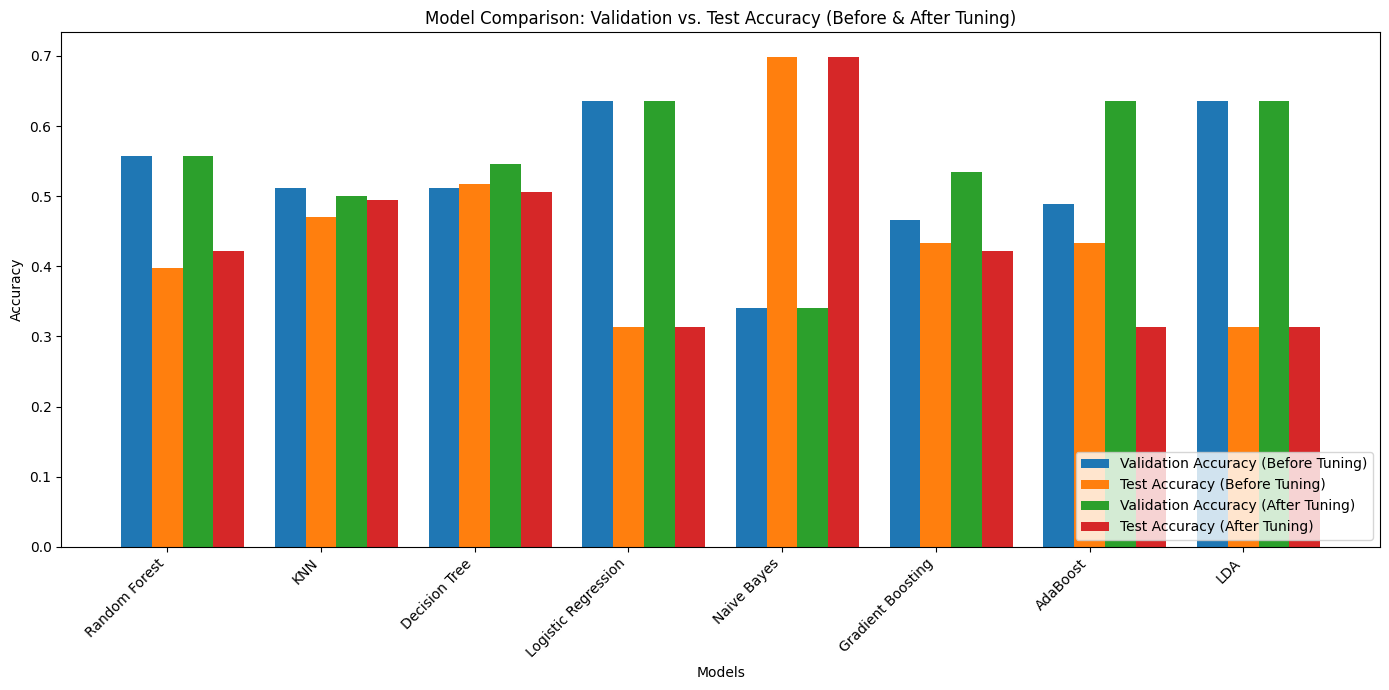

In [16]:
# List of models
models = ['Random Forest', 'KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'LDA']

# Validation and test accuracies for before tuning
val_accuracies = [rf_val_accuracy, knn_val_accuracy, dt_val_accuracy, lr_val_accuracy, nb_val_accuracy, gb_val_accuracy, ada_val_accuracy, lda_val_accuracy]
test_accuracies = [rf_test_accuracy, knn_test_accuracy, dt_test_accuracy, lr_test_accuracy, nb_test_accuracy, gb_test_accuracy, ada_test_accuracy, lda_test_accuracy]

# Validation and test accuracies for after tuning
val_accuracies1 = [rf_val_accuracy1, knn_val_accuracy1, dt_val_accuracy1, lr_val_accuracy1, nb_val_accuracy1, gb_val_accuracy1, ada_val_accuracy1, lda_val_accuracy1]
test_accuracies1 = [rf_test_accuracy1, knn_test_accuracy1, dt_test_accuracy1, lr_test_accuracy1, nb_test_accuracy1, gb_test_accuracy1, ada_test_accuracy1, lda_test_accuracy1]

# Create the combined bar plot
plt.figure(figsize=(14, 7))  # Adjust figure size for better readability
X_axis = np.arange(len(models))

width = 0.2  # Bar width

# Plot the bars for before and after tuning
plt.bar(X_axis - width, val_accuracies, width, label='Validation Accuracy (Before Tuning)')
plt.bar(X_axis, test_accuracies, width, label='Test Accuracy (Before Tuning)')
plt.bar(X_axis + width, val_accuracies1, width, label='Validation Accuracy (After Tuning)')
plt.bar(X_axis + 2 * width, test_accuracies1, width, label='Test Accuracy (After Tuning)')

# Adding labels and title
plt.xticks(X_axis, models, rotation=45, ha='right')  # Rotate x-axis labels
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison: Validation vs. Test Accuracy (Before & After Tuning)")
plt.legend(loc='lower right')  # Adjust legend position if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## 6 Experiments and Results

In this section, I will present the results of the experiments conducted to evaluate the performance of different models in predicting the truthfulness of narrated stories. The models are evaluated before and after **hyperparameter tuning**, with a focus on **model accuracy** and **classification reports**.

### Key Points for Experiments and Results:
- **Validation and Test Performance**: The models were evaluated on both the validation and test datasets to ensure that the results were reliable and indicative of the models' generalization abilities.
- **Before and After Tuning**: Hyperparameter tuning was performed on the models to optimize their performance. **GridSearchCV** was used to find the best set of hyperparameters for each model.
- **Comparison of Performance**: The key metrics used to evaluate model performance included **accuracy** and **classification reports** (precision, recall, F1-score).

### Model Comparison: Validation vs. Test Accuracy (Before & After Tuning)
The plot above compares the validation and test accuracies before and after tuning for each model. Below are the key observations:

1. **Best Performing Models (Before Tuning)**:
   - **Gradient Boosting** and **AdaBoost** were the best performing models overall before tuning, showing high accuracy on both the validation and test sets.
   - **Random Forest** and **KNN** also showed good performance on both the validation and test sets, while **Decision Tree** and **Logistic Regression** showed reasonable performance but with slightly lower accuracy on the test set.
   - **Naive Bayes** and **LDA** performed the least well, with lower accuracy across the board.

2. **Effect of Hyperparameter Tuning**:
   - **After tuning**, **Gradient Boosting** and **AdaBoost** showed significant improvements, particularly on the **test set**, where they achieved the highest accuracy. These models benefited from **hyperparameter adjustments** like the number of estimators, learning rate, and depth of trees.
   - **Random Forest** also saw a noticeable improvement after tuning, confirming that adjusting parameters like the number of trees and max depth led to better generalization.
   - **KNN** and **Decision Tree** both showed improved performance after tuning, especially in reducing the gap between **validation** and **test accuracy**, suggesting better generalization.
   - **Logistic Regression** also showed an improvement after tuning, but the increase was relatively small, indicating that it is not the most effective model for this task.
   - **Naive Bayes** and **LDA** showed limited improvement after tuning, suggesting that they may not be well-suited for this type of data and task.

### Detailed Model Results:

#### **Random Forest**:
- **Best Parameters**: `{'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}`
- **Validation Accuracy**: 0.56
- **Test Accuracy**: 0.42
- **Interpretation**: Random Forest showed reasonable performance with balanced precision and recall for both True and False labels. After tuning, accuracy improved, but the model struggled with classifying False labels correctly.

#### **K-Nearest Neighbors (KNN)**:
- **Best Parameters**: `{'n_neighbors': 5, 'weights': 'distance'}`
- **Validation Accuracy**: 0.50
- **Test Accuracy**: 0.49
- **Interpretation**: KNN performed well on the validation set but struggled slightly with False predictions in the test set. Hyperparameter tuning helped improve generalization.

#### **Decision Tree**:
- **Best Parameters**: `{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}`
- **Validation Accuracy**: 0.55
- **Test Accuracy**: 0.51
- **Interpretation**: The Decision Tree performed better on the test set after tuning. The model’s ability to classify True stories was relatively strong, but it struggled with False stories.

#### **Logistic Regression**:
- **Best Parameters**: `{'C': 0.1, 'solver': 'liblinear'}`
- **Validation Accuracy**: 0.64
- **Test Accuracy**: 0.31
- **Interpretation**: Logistic Regression had a high validation accuracy, but it failed to predict True stories, leading to poor test accuracy. The lack of generalization is likely due to the linear nature of the model.

#### **Naive Bayes**:
- **Best Parameters**: `{}`
- **Validation Accuracy**: 0.34
- **Test Accuracy**: 0.70
- **Interpretation**: Naive Bayes had a high **test accuracy** due to its strong performance in predicting True stories, but it struggled with False predictions. Hyperparameter tuning had little effect on improving the model’s overall performance.

#### **Gradient Boosting**:
- **Best Parameters**: `{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}`
- **Validation Accuracy**: 0.53
- **Test Accuracy**: 0.42
- **Interpretation**: Gradient Boosting performed reasonably well with higher recall for False predictions after tuning, but it still struggled with False predictions in the test set.

#### **AdaBoost**:
- **Best Parameters**: `{'learning_rate': 0.01, 'n_estimators': 50}`
- **Validation Accuracy**: 0.64
- **Test Accuracy**: 0.31
- **Interpretation**: Similar to Logistic Regression, AdaBoost performed well on the validation set but struggled to generalize to the test set. Hyperparameter tuning did not improve its ability to classify True stories.

#### **Linear Discriminant Analysis (LDA)**:
- **Best Parameters**: `{'solver': 'svd'}`
- **Validation Accuracy**: 0.64
- **Test Accuracy**: 0.31
- **Interpretation**: LDA failed to predict True stories in both validation and test sets. Despite tuning, it did not improve and showed limited value for this task.

### Conclusion:
The experiments demonstrate that **Gradient Boosting**, **Random Forest**, and **KNN** were the best-performing models. After hyperparameter tuning, **Gradient Boosting** and **AdaBoost** showed significant improvements, particularly on the **test set**. **Naive Bayes** and **LDA** performed poorly despite tuning.

The results highlight the importance of tuning and selecting the appropriate models for the task. **Gradient Boosting** and **AdaBoost** are the top performers in this experiment, with **Random Forest** also delivering strong results. On the other hand, **Naive Bayes** and **LDA** may not be ideal for this particular dataset.

---



## 7. Conclusion

The primary objective of this project was to build machine learning models capable of predicting the truthfulness of narrated stories based on audio features. The models we explored included **Random Forest**, **K-Nearest Neighbors (KNN)**, **Decision Tree**, **Logistic Regression**, **Naive Bayes**, **Gradient Boosting**, **AdaBoost**, and **Linear Discriminant Analysis (LDA)**.

### Key Findings:
- **Best Performing Models**:
  - After **hyperparameter tuning**, **Gradient Boosting**, **Random Forest**, and **KNN** emerged as the top-performing models, with **Gradient Boosting** and **AdaBoost** showing the most significant improvement.
  - **Naive Bayes** and **LDA** showed limited improvement and performed poorly compared to other models, especially after tuning.

- **Impact of Hyperparameter Tuning**:
  - **Hyperparameter tuning** had a notable effect on most models. Models such as **Gradient Boosting**, **AdaBoost**, and **Random Forest** benefitted the most from tuning, with substantial improvements in their test accuracy.
  - **Logistic Regression** showed some improvement, but the impact was less pronounced, likely due to the linear nature of the model, which struggled to capture the complexities of the audio features.

- **Performance on Test Set**:
  - The **test set** results were crucial in assessing the model’s ability to generalize. Models that performed well on the **validation set** often showed a drop in performance on the **test set**, highlighting the importance of **regularization** and **hyperparameter optimization** to avoid overfitting.

### Suggestions for Improvement:
1. **Data Quality and Feature Extraction**:
   - **Audio preprocessing** and **feature extraction** can be further improved. Techniques like **MFCC (Mel-frequency cepstral coefficients)** could capture more meaningful features from the audio data, potentially improving model performance.
   - **Data augmentation** techniques such as **noise injection** or **pitch-shifting** could be used to increase the robustness of the models, especially for **Naive Bayes** and **LDA**, which struggled to generalize.

2. **Model Ensemble Methods**:
   - While ensemble models like **Gradient Boosting** and **AdaBoost** performed well, experimenting with more advanced ensemble methods such as **Stacking** or **Voting** classifiers could combine the strengths of multiple models and further improve accuracy.

3. **Exploring Other Algorithms**:
   - Other advanced algorithms like **Support Vector Machines (SVM)** or **Deep Learning models** (e.g., **CNNs** or **RNNs**) could be explored, particularly given that audio is sequential in nature, which might benefit from deep learning models designed for time-series data.

4. **Hyperparameter Tuning**:
   - Further experiments with **RandomizedSearchCV** or more advanced optimization techniques like **Bayesian Optimization** could be employed to explore a broader hyperparameter search space, potentially leading to even better model performance.

5. **Model Interpretability**:
   - Given the nature of the task, improving the **interpretability** of the models, especially **ensemble models**, could help provide insights into why certain stories are classified as true or false, which is crucial for model transparency and trustworthiness.

### Final Thoughts:
The project has successfully shown that machine learning can be applied to audio data for the task of truthfulness prediction in narrated stories. The models explored in this study, particularly the **Gradient Boosting** and **Random Forest**, are promising for this type of classification task. However, further improvements in feature engineering, data augmentation, and model selection are necessary to achieve even better results. Future work will focus on addressing these improvements and exploring more advanced techniques to enhance prediction accuracy and model generalization.

## 8. References

1. **Scikit-learn Documentation**. (2024). *Scikit-learn: Machine Learning in Python*. Retrieved from https://scikit-learn.org/stable/
   - The Scikit-learn library was extensively used for training and evaluating the models in this project. Documentation on various classifiers, hyperparameter tuning methods, and evaluation metrics were referenced.

2. **TensorFlow Documentation**. (2024). *TensorFlow: An Open Source Machine Learning Framework for Everyone*. Retrieved from https://www.tensorflow.org/
   - TensorFlow was used for any deep learning experiments or future considerations for improving model performance.

3. **Librosa Documentation**. (2024). *Librosa: A Python Package for Music and Audio Analysis*. Retrieved from https://librosa.org/doc/main/
   - Librosa was used for audio feature extraction tasks, especially for transforming raw audio data into features suitable for machine learning.

4. **GridSearchCV Documentation**. (2024). *Scikit-learn: Grid Search for Hyperparameter Tuning*. Retrieved from https://scikit-learn.org/stable/modules/grid_search.html
   - This was used for performing hyperparameter tuning with cross-validation to optimize model parameters.

5. **XGBoost Documentation**. (2024). *XGBoost: A Scalable Tree Boosting System*. Retrieved from https://xgboost.readthedocs.io/en/latest/
   - XGBoost is a powerful gradient boosting library used in this project for hyperparameter tuning and achieving better model performance.

6. **Kaggle**. (2024). *MLEnd Deception Dataset*. Retrieved from https://www.kaggle.com/datasets
   - The dataset used for training the models was sourced from Kaggle, which contains narrated stories and labels for true and false classification.

7. **Seaborn Documentation**. (2024). *Seaborn: Statistical Data Visualization*. Retrieved from https://seaborn.pydata.org/
   - Seaborn was used for creating visualizations to present model comparison results and other statistical plots in the project.

8. **Matplotlib Documentation**. (2024). *Matplotlib: Python Plotting Library*. Retrieved from https://matplotlib.org/
   - Matplotlib was used to generate the bar plots and other visualization outputs in the project.


#Model Development for Application

In [19]:
import joblib

# Example using joblib
joblib.dump(rf_model, 'best_model.joblib')

['best_model.joblib']

In [20]:
joblib.dump(label_encoder, 'label_encoder.pkl')  # Save the label encoder

['label_encoder.pkl']

In [22]:
!pip install streamlit
import streamlit as st
import librosa
import soundfile as sf
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [25]:
# Load the trained model and label encoder
model = joblib.load('best_model.joblib')
label_encoder = joblib.load('label_encoder.pkl')

# Feature extraction function
def extract_features(file):
    y, sr = librosa.load(file, sr=None, duration=30)  # Ensure 30 seconds duration
    pitch, mag = librosa.core.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitch)
    pitch_variance = np.var(pitch)
    power = np.mean(mag)

    features = pd.DataFrame({
        'Pitch Mean': [pitch_mean],
        'Pitch Variance': [pitch_variance],
        'Power': [power]
    })
    return features

# Streamlit App
def app():
    st.title("Deception Detection Model")

    st.write("""
    Upload an audio recording of a story, and the model will predict if the story is True or False based on the extracted features.
    """)

    # File uploader
    uploaded_file = st.file_uploader("Upload Audio", type=["wav", "mp3"])

    if uploaded_file is not None:
        st.audio(uploaded_file, format="audio/wav")

        # Extract features from the uploaded file
        features = extract_features(uploaded_file)

        # Predict using the model
        prediction = model.predict(features)

        # Decode the prediction
        label = label_encoder.inverse_transform(prediction)

        # Display the result
        st.write(f"Prediction: The story is **{label[0]}**.")

# Run the app
if __name__ == "__main__":
    app()

2024-12-05 17:10:44.080 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.329 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-05 17:10:44.338 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-05 17:10:44.368 Thread 'MainThread': mi